В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn import preprocessing

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
df = pd.read_csv('C:/Users/Ivanna/Documents/Dataset/cars.csv')

In [3]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [ ]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [3]:
df.shape

(100, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


### Аналіз числових стовпців

In [4]:
number_df = df.select_dtypes(include="number")
number_df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [6]:
number_df.shape[1]

8

### Аналіз категоріальних стовпців

In [5]:
categorical_df = df.select_dtypes(include = "object")
categorical_df.nunique()

Brand           11
Model           58
Fuel_Type        2
Transmission     2
Owner_Type       3
dtype: int64

In [6]:
categorical_df.shape[1]

5

In [10]:
categorical_df.Fuel_Type.value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

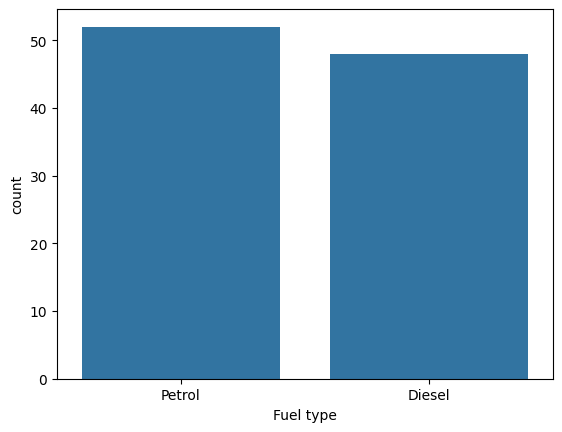

In [11]:
sns.countplot(data=categorical_df, x='Fuel_Type')
plt.xlabel('Fuel type')
plt.show()

In [12]:
categorical_df.Transmission.value_counts()

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

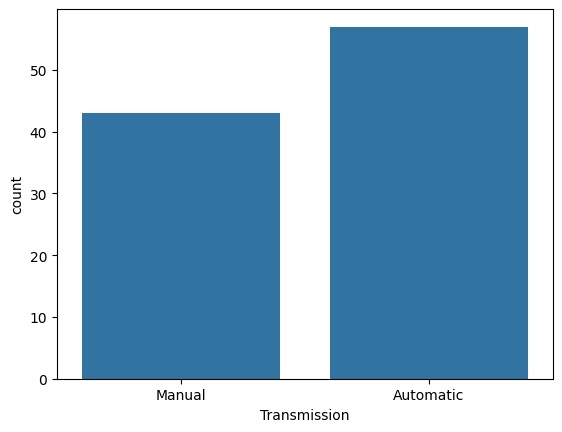

In [13]:
sns.countplot(data=categorical_df, x='Transmission')
plt.xlabel('Transmission')
plt.show()

In [14]:
categorical_df.Owner_Type.value_counts()

Owner_Type
First     44
Second    43
Third     13
Name: count, dtype: int64

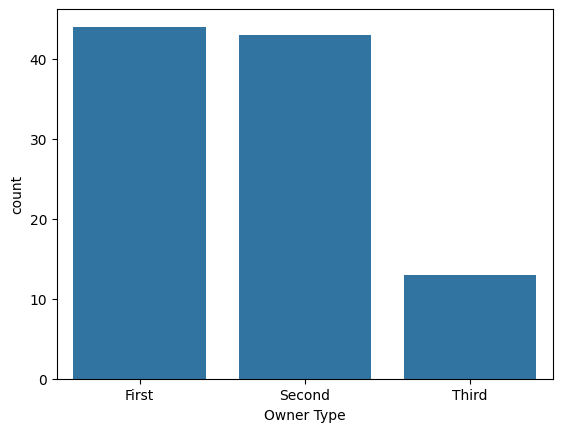

In [15]:
sns.countplot(data=categorical_df, x='Owner_Type')
plt.xlabel('Owner Type')
plt.show()

**Спостереження:** 
Розмір датасету 100 рядків та 13 колонок. Всього 8 числових колонок та 5 категоріальних, з них:
- 2 бінарні (мають лише 2 значення) - `Fuel_Type`, `Transmission`
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку `Brand`, `Model`
- 1 колонка `Owner_Type`, в якій можна встановити відношення порядку (наприклад 1<2<3)

# Поділ даних на тренувальні та тестові

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [7]:
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Кодування категоріальних колонок

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 та 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

### Кодування `Fuel_Type`

In [8]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [9]:
Fuel_Type_Codes = {"Petrol": 1, "Diesel": 0}

In [10]:
X_test["Is_Petrol"] = X_test["Fuel_Type"].map(Fuel_Type_Codes)
X_train["Is_Petrol"] = X_train["Fuel_Type"].map(Fuel_Type_Codes)

In [11]:
display(X_test.head(), X_test.shape, X_train.head(), X_train.shape)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Is_Petrol
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1


(20, 13)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Is_Petrol
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1


(80, 13)

### Кодування `Transmission`

In [12]:
df.Transmission.value_counts()

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

In [13]:
Transmission_Codes = {"Automatic": 1, "Manual": 0}

In [14]:
X_test["Is_Automatic"] = X_test["Transmission"].map(Transmission_Codes)
X_train["Is_Automatic"] = X_train["Transmission"].map(Transmission_Codes)

In [15]:
display(X_test.head(), X_test.shape, X_train.head(), X_train.shape)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Is_Petrol,Is_Automatic
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0


(20, 14)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Is_Petrol,Is_Automatic
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1


(80, 14)

### Кодування `Brand`

In [16]:
df.Brand.value_counts()

Brand
Ford          11
Tata          11
Hyundai       11
BMW           10
Toyota        10
Audi          10
Volkswagen    10
Mercedes      10
Honda          6
Maruti         6
Mahindra       5
Name: count, dtype: int64

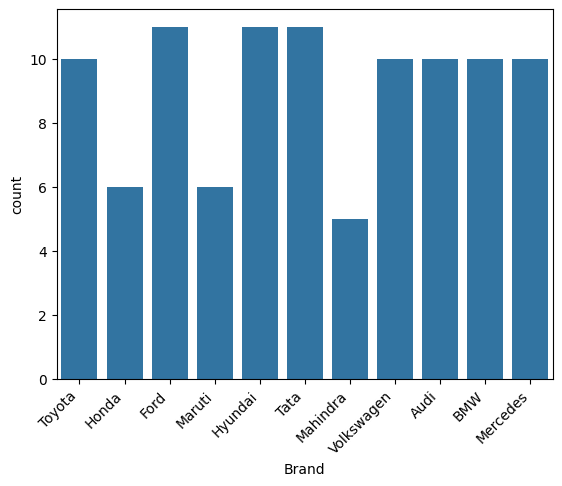

In [17]:
sns.countplot(data=df, x='Brand')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
# фітимо на тренувальному датасеті
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [19]:
# застосовуємо до тестового датасету
test_one_hot = enc.transform(X_test[['Brand']]).toarray()
test_one_hot, test_one_hot.shape
X_test[enc.categories_[0]] = test_one_hot

In [20]:
# застосовуємо до тренувального датасету
train_one_hot = enc.transform(X_train[['Brand']]).toarray()
train_one_hot, train_one_hot.shape
X_train[enc.categories_[0]] = train_one_hot

In [21]:
pd.set_option('display.max_columns', 100)

In [22]:
display(X_test.head(), X_test.shape, X_train.head(), X_train.shape)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Is_Petrol,Is_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(20, 25)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Is_Petrol,Is_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


(80, 25)

### Кодування `Owner_Type`

In [23]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [24]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Is_Petrol,Is_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Is_Petrol,Is_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

### Кодування `Model`

In [25]:
df.Model.unique()

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

In [26]:
df.Model.nunique()

58

Згрупуємо моделі по сегментам: Luxury, Premium, Mass_Market

In [27]:
def group_cars(model_name):
    luxury = ['C-Class', 'E-Class', 'GLE', 'GLC', 'GLA', 
              '3 Series', '5 Series', '7 Series', 
              'X1', 'X3', 'X5', 
              'A3', 'A4', 'A5', 'A6', 
              'Q3', 'Q7']
    premium = ['Safari', 'Harrier', 'Creta', 'Innova', 'Innova Crysta',
               'Fortuner', 'Tiguan', 'T-Roc', 'Passat',  
               'Camry', 'Corolla', 'Sonata', 'Mustang', 'Endeavour', 'Ranger']
    
    if model_name in luxury:
        return 'Luxury'
    elif model_name in premium:
        return 'Premium'
    else:
        return 'Mass_Market'

In [28]:
# Застосування
X_train['Model_Group'] = X_train['Model'].apply(group_cars)
X_test['Model_Group'] = X_test['Model'].apply(group_cars)

# Mapping
Model_Codes = {'Mass_Market': 0, 'Premium': 1, 'Luxury': 2}
X_train['Model_Code'] = X_train['Model_Group'].map(Model_Codes)
X_test['Model_Code'] = X_test['Model_Group'].map(Model_Codes)

In [29]:
display(X_train.head(), X_train.shape, X_test.head(), X_test.shape)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Is_Petrol,Is_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Group,Model_Code
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Premium,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Luxury,2
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Luxury,2
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Mass_Market,0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Luxury,2


(80, 28)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Is_Petrol,Is_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Group,Model_Code
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Luxury,2
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Mass_Market,0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Mass_Market,0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mass_Market,0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Mass_Market,0


(20, 28)

# Кореляційна матриця

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [46]:
# Залишаємо тільки числові стовпці, Car_ID теж видаляю, щоб не додавати моделі шуму
X_train = X_train.drop(columns='Car_ID').select_dtypes(include="number")
X_test = X_test.drop(columns='Car_ID').select_dtypes(include="number")

display(X_train.shape), display(X_test.shape)

(80, 21)

(20, 21)

(None, None)

In [47]:
pd.concat([X_train, y_train], axis=1).corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Is_Petrol,Is_Automatic,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Code,Price
Year,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.325429,-0.233769
Kilometers_Driven,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,0.052136,-0.083951
Mileage,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.581527,-0.638404
Engine,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.571866,0.710561
Power,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.701730,0.849137
Seats,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.015684,0.000979
Is_Petrol,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,-0.142448,-0.110782
Is_Automatic,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.653205,0.680731
Audi,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.426241,0.328858
BMW,0.202517,-0.247042,-0.134105,0.287119,0.372652,-0.108079,-0.048475,0.283188,-0.118678,1.000000,-0.126761,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.009076,0.455270,0.477522


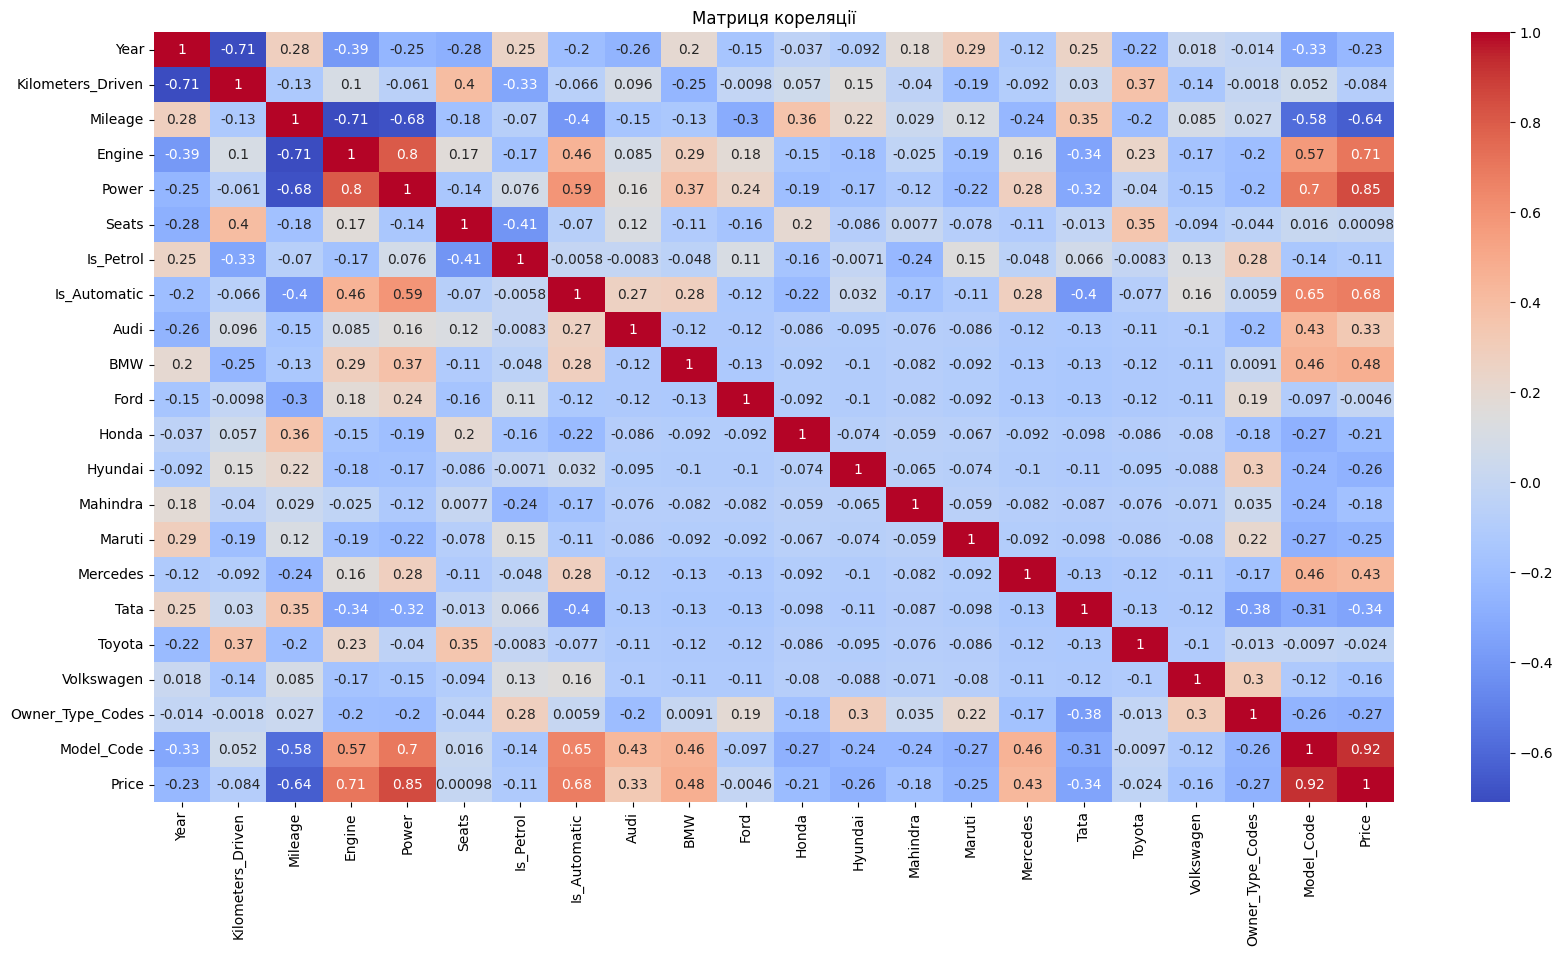

In [48]:
plt.figure(figsize=(20, 10))
sns.heatmap(pd.concat([X_train, y_train], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

**Спостереження**
- Колонки, що корелюють з цільовою змінною на більш ніж 0.5 за модулем: `Mileage`, `Engine`, `Power`, `Is_Automatic`, `Model_Code`.

# Тренування лінійної регресії

**Завдання 6**. Тренуємо лінійну регресію.

0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресію з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [49]:
model = LinearRegression().fit(X_train, y_train)

predictions_test = model.predict(X_test)
test_loss = root_mean_squared_error(y_test, predictions_test)
print('Test Loss:', test_loss)

predictions_train = model.predict(X_train)
train_loss = root_mean_squared_error(y_train, predictions_train)
print('Train Loss:', train_loss)

Test Loss: 246440.41639031496
Train Loss: 203262.84134878134


In [50]:
(model.coef_, model.intercept_)

(array([ 9.61285777e+03, -1.28063241e+01, -2.36784191e+04,  6.14518367e+00,
         5.55945479e+03,  1.92954947e+04, -2.91528435e+05,  1.83147528e+05,
         4.64282577e+05,  4.02565847e+05, -2.14720369e+05, -1.80655318e+04,
        -3.41573616e+05, -3.51458540e+05, -2.60890462e+05,  4.53330200e+05,
        -3.11223788e+04,  1.25175196e+05, -2.27522923e+05,  8.63771863e+04,
         3.16151616e+05]),
 np.float64(-18345468.50773679))

In [51]:
np.append(model.coef_, model.intercept_)

array([ 9.61285777e+03, -1.28063241e+01, -2.36784191e+04,  6.14518367e+00,
        5.55945479e+03,  1.92954947e+04, -2.91528435e+05,  1.83147528e+05,
        4.64282577e+05,  4.02565847e+05, -2.14720369e+05, -1.80655318e+04,
       -3.41573616e+05, -3.51458540e+05, -2.60890462e+05,  4.53330200e+05,
       -3.11223788e+04,  1.25175196e+05, -2.27522923e+05,  8.63771863e+04,
        3.16151616e+05, -1.83454685e+07])

In [52]:
# Датафрейм з фічами та їх вагою
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values(by='weight', ascending=False).round(2)

,feature,weight
8,Audi,464282.58
15,Mercedes,453330.20
9,BMW,402565.85
20,Model_Code,316151.62
7,Is_Automatic,183147.53
17,Toyota,125175.20
19,Owner_Type_Codes,86377.19
5,Seats,19295.49
0,Year,9612.86
4,Power,5559.45


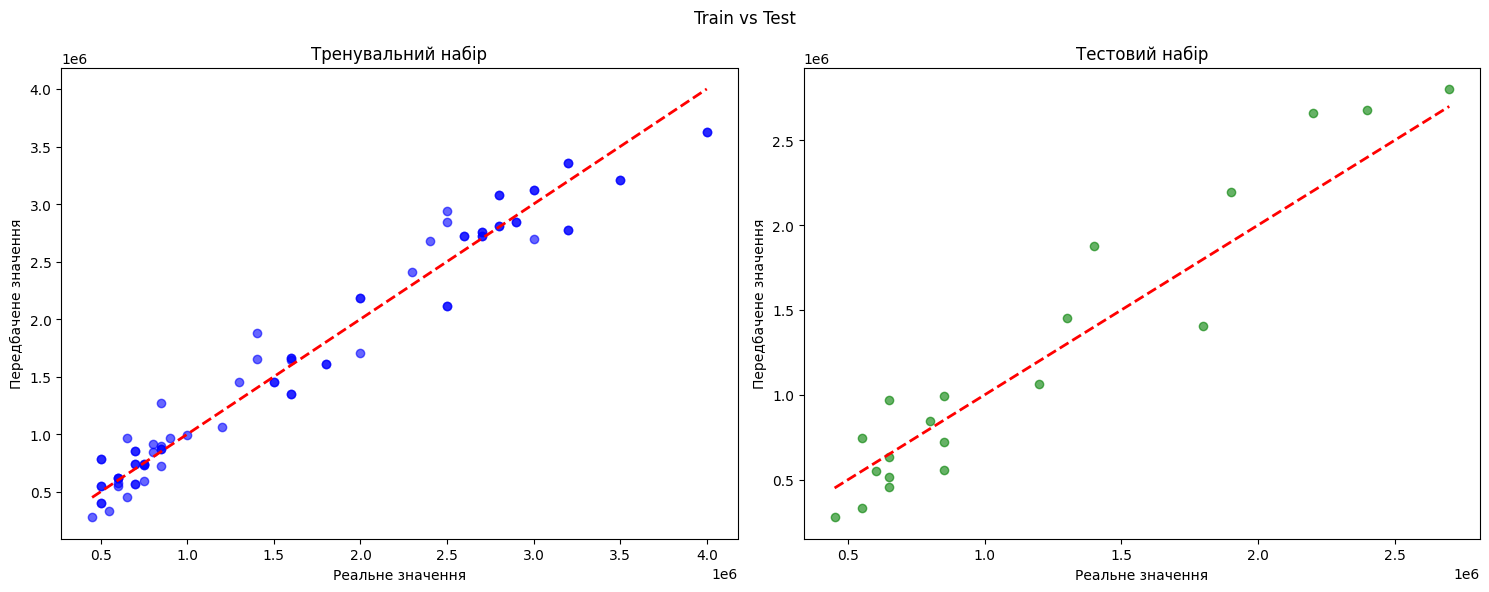

In [53]:
# Створюємо фігуру з 1 рядком та 2 колонками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# --- Графік для тренувального набору ---
ax1.scatter(y_train, predictions_train, alpha=0.6, color='blue')
ax1.set_xlabel('Реальне значення')
ax1.set_ylabel('Передбачене значення')
ax1.set_title('Тренувальний набір')
# Додамо лінію ідеального передбачення
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)

# --- Графік для тестового набору ---
ax2.scatter(y_test, predictions_test, alpha=0.6, color='green')
ax2.set_xlabel('Реальне значення')
ax2.set_ylabel('Передбачене значення')
ax2.set_title('Тестовий набір')
# Додамо лінію ідеального передбачення
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)


fig.suptitle('Train vs Test')
plt.tight_layout()
plt.show()

**Спостереження**
- На тестовій моделі маємо більшу похибку: 246440 проти 203262
- Графіки розсіювання показують, що точки розташовуються вздовж лінії x=y, де передбачувані значення ідеально відповідають реальним значенням.
- На тестовому наборі точки ширше відхиляються від червоної лінії. Ці випадки свідчать, що прогнози моделі менш точні. Але через маленький розмір датасету, складно зробити остаточні висновки, чи модель потребує вдосконалення, чи це просто аутлаєри.

# Масштабування даних

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
X_train.select_dtypes(include='number').columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Is_Petrol', 'Is_Automatic', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai',
       'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota', 'Volkswagen',
       'Owner_Type_Codes', 'Model_Code'],
      dtype='object')

In [57]:
# Відфільтровуємо стовпці для масштабування. 
# Стовпці що утворились з категоріальних, я не масштабую, в них значення в діапазоні [0, 3].
num_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
print("Стовпці для масштабування:", num_cols)

Стовпці для масштабування: ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']


In [58]:
# тренуємо
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [59]:
# Масштабуємо тренувальні
X_train_scaled = X_train.copy()
X_train_scaled[num_cols] = scaler.transform(X_train[num_cols])

# Масштабуємо тестові
X_test_scaled = X_test.copy()
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [60]:
X_test_scaled.shape, X_train_scaled.shape

((20, 21), (80, 21))

In [61]:
# тренуємо модель на нових масштабованих даних
model_scaled = LinearRegression().fit(X_train_scaled, y_train)

# передбачаємо на масштабованих тестових
predictions_test = model_scaled.predict(X_test_scaled)
loss = root_mean_squared_error(y_test, predictions_test)
print('Test Loss:', loss)

# передбачаємо на масштабованих тренувальних
predictions_train = model_scaled.predict(X_train_scaled)
loss = root_mean_squared_error(y_train, predictions_train)
print('Train Loss:', loss)

Test Loss: 246440.4163903159
Train Loss: 203262.84134878172


In [62]:
# Порівнюємо ваги в формулі
weights_df = pd.DataFrame({
    'feature': np.append(X_train_scaled.columns, 1),
    'weight': np.append(model_scaled.coef_, model_scaled.intercept_)
})

weights_df['abs_weight'] = abs(weights_df['weight'])
weights_df.sort_values(by='abs_weight', ascending=False).round(2)

,feature,weight,abs_weight
21,1,1329895.05,1329895.05
8,Audi,464282.58,464282.58
15,Mercedes,453330.20,453330.20
4,Power,452669.02,452669.02
9,BMW,402565.85,402565.85
13,Mahindra,-351458.54,351458.54
12,Hyundai,-341573.62,341573.62
20,Model_Code,316151.62,316151.62
6,Is_Petrol,-291528.44,291528.44
14,Maruti,-260890.46,260890.46


**Спостереження**
- Після масштабування змінилась вага коефіцієнтів. Найважливіші зараз: вільний член, Audi, Mercedes, Power, BMW.

# Модель з statsmodels

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [63]:
import statsmodels.api as sm

In [88]:
# вчимо модель на тренувальному наборі
Y = y_train
X = sm.add_constant(X_train_scaled)

model = sm.OLS(Y.values,X)
results = model.fit()
results.params.sort_values(ascending=False).round(2)

const                1219070.46
Audi                  575107.16
Mercedes              564154.79
BMW                   513390.43
Power                 452669.02
Model_Code            316151.62
Toyota                235999.78
Is_Automatic          183147.53
Honda                  92759.06
Owner_Type_Codes       86377.19
Tata                   79702.21
Seats                  14301.79
Year                   10773.67
Engine                  4035.61
Mileage               -80762.48
Ford                 -103895.78
Volkswagen           -116698.34
Kilometers_Driven    -117428.54
Maruti               -150065.87
Hyundai              -230749.03
Mahindra             -240633.95
Is_Petrol            -291528.44
dtype: float64

In [89]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     73.37
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           2.77e-34
Time:                        12:30:55   Log-Likelihood:                -1091.3
No. Observations:                  80   AIC:                             2225.
Df Residuals:                      59   BIC:                             2275.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.219e+06   1.41e+0

In [90]:
# Ознаки, що є стат.значущими на рівні 0.05
results.pvalues[results.pvalues < 0.05]

const                4.518799e-12
Kilometers_Driven    3.869100e-02
Power                8.601821e-08
Is_Petrol            3.248799e-03
Is_Automatic         4.445747e-02
Audi                 2.938142e-03
BMW                  1.219644e-02
Mercedes             2.455438e-03
Toyota               3.298574e-02
Model_Code           4.533147e-02
dtype: float64

**Спостереження:** Ознаки, що є стат значущими на рівні 0.05
- вільний член
- Kilometers_Driven
- Power
- Is_Petrol
- Is_Automatic
- Audi
- BMW
- Mercedes
- Toyota
- Model_Code


## Модель на стат. значущих ознаках

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [91]:
features_05 = results.pvalues[results.pvalues < 0.05].index.to_list()
features_to_use = [el for el in features_05 if el != 'const']
features_to_use

['Kilometers_Driven',
 'Power',
 'Is_Petrol',
 'Is_Automatic',
 'Audi',
 'BMW',
 'Mercedes',
 'Toyota',
 'Model_Code']

In [92]:
# вчимо модель на тренувальному наборі
X_05 = sm.add_constant(X_train_scaled[features_to_use])

model_05 = sm.OLS(Y.values,X_05)
results_05 = model_05.fit()
results_05.params.sort_values(ascending=False).round(2)

const                1145219.23
Mercedes              540984.95
Audi                  527057.93
BMW                   507375.12
Power                 465077.27
Model_Code            414560.73
Toyota                326902.49
Is_Automatic          127005.35
Kilometers_Driven    -107729.62
Is_Petrol            -233075.54
dtype: float64

In [93]:
print(results_05.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     164.6
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           1.85e-43
Time:                        12:32:25   Log-Likelihood:                -1097.5
No. Observations:                  80   AIC:                             2215.
Df Residuals:                      70   BIC:                             2239.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.145e+06   7.26e+0

**Спостереження**
- R-squared зменшився на 0.006 - незначна зміна.
- Adj. R-squared збільшився на 0.001 - незначна зміна.
- Ознака Is_Automatic в новій моделі стала статистично незначуща.

## Модель на ознаках у яких p_value < 0.25

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [96]:
features_25 = results.pvalues[results.pvalues < 0.25].index.to_list()
len(features_25), len(features_05)

(15, 10)

In [97]:
features_to_use_25 = [el for el in features_25 if el != 'const']
features_to_use_25

['Kilometers_Driven',
 'Mileage',
 'Power',
 'Is_Petrol',
 'Is_Automatic',
 'Audi',
 'BMW',
 'Hyundai',
 'Mahindra',
 'Maruti',
 'Mercedes',
 'Toyota',
 'Owner_Type_Codes',
 'Model_Code']

In [98]:
# вчимо модель на тренувальному наборі
X_25 = sm.add_constant(X_train_scaled[features_to_use_25])

model_25 = sm.OLS(Y.values,X_25)
results_25 = model_25.fit()
results_25.params.sort_values(ascending=False).round(2)

const                1276079.19
Mercedes              726271.07
Audi                  723067.68
BMW                   716610.97
Power                 445259.48
Toyota                291382.45
Model_Code            220994.86
Is_Automatic          182191.67
Owner_Type_Codes       26251.15
Mileage               -79268.69
Kilometers_Driven     -97761.35
Maruti               -119151.38
Hyundai              -215648.54
Mahindra             -244279.54
Is_Petrol            -295736.34
dtype: float64

In [99]:
print(results_25.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           1.12e-39
Time:                        12:35:45   Log-Likelihood:                -1093.0
No. Observations:                  80   AIC:                             2216.
Df Residuals:                      65   BIC:                             2252.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.276e+06   9.13e+0

In [107]:
set(features_to_use_25) - set(features_to_use)

{'Hyundai', 'Mahindra', 'Maruti', 'Mileage', 'Owner_Type_Codes'}

In [125]:
# Перевірка, чи модель взагалі працює краще за "середнє арифметичне"
if results.f_pvalue < 0.05:
    print(f"Модель статистично значуща. P-value: {results.f_pvalue}")
else:
    print("Модель статистично незначуща, дані схожі на випадковий шум.")

Модель статистично значуща. P-value: 2.769079337063619e-34


In [139]:
comparison_df = pd.DataFrame({
    'model': ['All features', 'p<0.05', 'p<0.25'],
    'f_pvalue': [results.f_pvalue, results_05.f_pvalue, results_25.f_pvalue],
    'fvalue': [results.fvalue.round(3), results_05.fvalue.round(3), results_25.fvalue.round(3)],
    'llf': [results.llf.round(3), results_05.llf.round(3), results_25.llf.round(3)],
    'rsquared': [results.rsquared.round(3), results_05.rsquared.round(3), results_25.rsquared.round(3)],
    'rsquared_adj': [results.rsquared_adj.round(3), results_05.rsquared_adj.round(3), results_25.rsquared_adj.round(3)]
})

comparison_df

,model,f_pvalue,fvalue,llf,rsquared,rsquared_adj
0,All features,2.769079e-34,73.372,-1091.295,0.961,0.948
1,p<0.05,1.850288e-43,164.605,-1097.484,0.955,0.949
2,p<0.25,1.119395e-39,110.540,-1092.974,0.960,0.951


**Спостереження**
- В останній моделі обидва показники R-squared та Adj. R-squared збільшились. Adj. R-squared максимальний з усіх попередній, але різниця зовсім незначна - 0.002 та 0.003.
- З трьох моделей я о б обрала другу, де є лише ознаки з p-value<0.05. Вона найпростіша та має найбільше значення F-statistic: 164.6, та найменше f_pvalue. Різниця в R-squared та Adj. R-squared незначні в порівнянні з іншими двома моделями.